# Resize And Rotation

In [2]:
from matplotlib.pyplot import imread as imread
from matplotlib.pyplot import imsave as imsave
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = imread('Bug.png')
print('img.ndim={}\nimg.shape={}'.format(img.ndim,img.shape))

img.ndim=3
img.shape=(375, 500, 3)


## Çok basit küçültme metodu
Bu metod ile image'in tam sayıda bölenebilecek şekilde hem ``width`` hem de ``height`` küçültebiliriz, burda yapılan işlem çok basit, diyelim fotoğrafın yarısını almak istiyoruz, o zaman foto pixel'lerinden bir tane kolon alıyoruz ve bir tane kolon bırakıyoruz, böylece son kolona kadar, aynı şekilde satırlar için..

Bu yöntem çok kaba bir yöntem çünkü fotoğraftan önemli parçası kullanmadan atıyoruz, fotoğraf'ta 500 tane var olduğu için göz ile bakarak çok ta belli olmaz.

Numpy ile bu işlem (:) ile kolayca yapılabilir, asıl image ``img`` olursa ve 3 boyutlu ise (yükseklik=375, genişlik=500, renklerin değerleri=3) ve onun geniliğini yarısını almak istiyorsak, böyle yapabiliriz :

In [4]:
temp = img[0:375, 0:500:2, 0:3]

Böylece :
* (0:375) : tüm satırları 0'den 374'a
* (0:500:2) : tüm kolonları **2'şer artırarak**
* (0:3) : tüm renkleri

almış oluyoruz.

Veya daha basit bir şekilde :

In [5]:
temp = img[:, ::2, :]

Yükarıdaki tam aynı anlamı ama hem **daha kısa** hem de **farklı boyutlu fotoğraflar** için de geçerli.

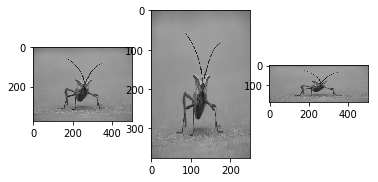

In [6]:
img1 = img[  : , ::2  ,  : ]
img2 = img[  ::2  , :  , : ]
plt.subplot(1,3,1), plt.imshow(img)
plt.subplot(1,3,2), plt.imshow(img1)
plt.subplot(1,3,3), plt.imshow(img2)

plt.show()

Yükarıdaki fotoğrafların etrafındaki ölçme rakamları dikkata alarak görebiliyoruz ki gerçekten fotoğraf küçüldü

## Negatif almak
Biz biliyoruz ki her pixel için 0 ile 255 arasında bir değer alıyor, o zaman 255'i tersi 0 olarak kabul edebiliriz, aynı şekilde 0'ın tersi 255..
128'in tersi ise 12 çünkü ortada kaldığı için
0.1'in tersi 0.9 ... vb

Genel olarak **``x``**'in tersi **``1-x``**'dır

**Önemli:** Eğer pixillerin değerleri 0 - 255 arasında, o zaman **``x``** pixelin negatifi = **``255 - x``**7

[ 254.3999939  254.3999939  254.3999939]


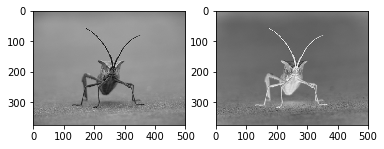

In [7]:
img = imread('Bug.png')
print(255-img[84,98])
img_neg = np.zeros(img.shape, type(img[0,0,0]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_neg[i,j] =  1 - img[i,j]
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(img_neg)

plt.show()

## 90 derecelik fotoğraf döndürme 

In [12]:
mirror1 = np.zeros([img.shape[1],img.shape[0],img.shape[2]])
for i in range(img.shape[1]):
    for j in range(img.shape[0]):
        mirror1[i,j] = img[j,i]

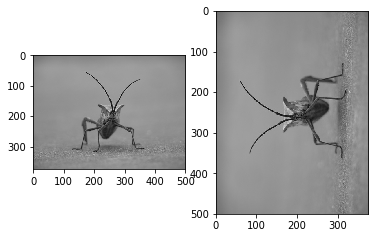

In [13]:
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(mirror1)
plt.show()